# Week 14 Homework

#### 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols

In [2]:
# a few words about why I did this.
pd.set_option('max_columns', 74)
pd.set_option('max_rows', 74)

In [3]:
#creating dataframe and looking at it
bottle = pd.read_csv("../week_13/bottle.csv", low_memory = False)
bottle.head(5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bottle.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [5]:
bottle.dtypes


Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   int64
T_degC                 float64
Salnty                 float64
O2ml_L                 float64
STheta                 float64
O2Sat                  float64
Oxy_µmol/Kg            float64
BtlNum                 float64
RecInd                   int64
T_prec                 float64
T_qual                 float64
S_prec                 float64
S_qual                 float64
P_qual                 float64
O_qual                 float64
SThtaq                 float64
O2Satq                 float64
ChlorA                 float64
Chlqua                 float64
Phaeop                 float64
Phaqua                 float64
PO4uM                  float64
PO4q                   float64
SiO3uM                 float64
SiO3qu                 float64
NO2uM                  float64
NO2q                   float64
NO3uM                  float64
NO3q    

### First pass: dropping uninformative columns (ID labels, object dtypes)

### Re: feature selection for this data set. Ultimately, feature selection should be guided by the context of the analysis. We should have some a priori sense of the kinds of questions we will ask of the data (which can be informed by multiple regression analysis), or the possible relationships between explanatory and response variables. 

For this homework assignment, the motivation for the multiple regression is unclear; are we trying to answer the same questions that we asked of the dataset for the linear regression? I am going to assume that the answer is 'yes'. In the last homework, we were looking at the relationship between salinity and water temperature (response variable). I assume that in this exercise we relax the focus on salinity and entertain other features as possibly exerting strong influence on water temperature. 

In [6]:
# check for variable type:
bottle.dtypes

#check for / count nulls
bottle.isnull().sum()

#column list:
bottle.columns

# drop columns with nulls > 70%; creating a function for this;

delete_col=[]
for i in range(len(bottle.columns)):
    percent_num = ((bottle.iloc[:,i].isnull().sum())/len(bottle))*100
    if percent_num >= 30:
            delete_col.append(bottle.columns[i])
            
print('Columns deleted from original daataset', delete_col)

bottle.drop(delete_col, axis = 1, inplace = True)


Columns deleted from original daataset ['BtlNum', 'T_qual', 'S_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Phaeop', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'C14As1', 'C14A1p', 'C14As2', 'C14A2p', 'DarkAs', 'DarkAp', 'MeanAs', 'MeanAp', 'IncTim', 'LightP', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']


In [7]:
# VARIABLES WITH OBJECT TYPE:
bottle.describe(include=['O'])

,Sta_ID,Depth_ID
count,864863,864863
unique,2634,864850
top,090.0 045.0,20-16045S-MX-110-2018-06330900-0088A-3
freq,10043,2


In [8]:
# Extracing Month from Depth_Id:

bottle['month']= list(map((lambda x: x[5:7] ),bottle['Depth_ID']))

bottle['year']= list(map((lambda x: x[0:2]+x[3:5] ),bottle['Depth_ID']))

In [9]:
# Droping object columns as they are out of scope:
bottle.drop(['Sta_ID','Depth_ID'],axis=1,inplace=True)

In [10]:
bottle.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq',
       'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA',
       'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES', 'month', 'year'],
      dtype='object')

#### 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

In [11]:
# Finding the correlation matrix for output variable "T_degC" with all other variables of the colunm:

bottle.corr()['T_degC']

Cst_Cnt        0.089329
Btl_Cnt        0.090118
Depthm        -0.681201
T_degC         1.000000
Salnty        -0.505266
O2ml_L         0.795700
STheta        -0.829155
O2Sat          0.850596
Oxy_µmol/Kg    0.795543
RecInd        -0.066507
T_prec        -0.041076
S_prec        -0.036218
P_qual        -0.000631
Chlqua        -0.006510
Phaqua        -0.006761
NH3q           0.001007
C14A1q        -0.004169
C14A2q        -0.004169
DarkAq        -0.004066
MeanAq        -0.004214
R_Depth       -0.681200
R_TEMP         1.000000
R_POTEMP       0.999954
R_SALINITY    -0.503959
R_SIGMA       -0.862161
R_SVA          0.964171
R_DYNHT       -0.799025
R_O2           0.795700
R_O2Sat        0.850365
R_PRES        -0.679852
Name: T_degC, dtype: float64

In [12]:
# Drop all the variables that are least correlated (less than 0.4) WHY DID I cHOOSE THIS CRITERION

bottle.drop(['Cst_Cnt', 'Btl_Cnt','RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq'],axis=1,inplace=True)

After observation colums with highly correlated with water temp are: 'Depthm' , 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg','R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA','R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES'.
These variables are strongly correlated with water temperature either positively or negatively,therefore chosen for analysis.
As independent variables need to uncorrelated to each other visually checking for the highly correlated independent variables then removing them.

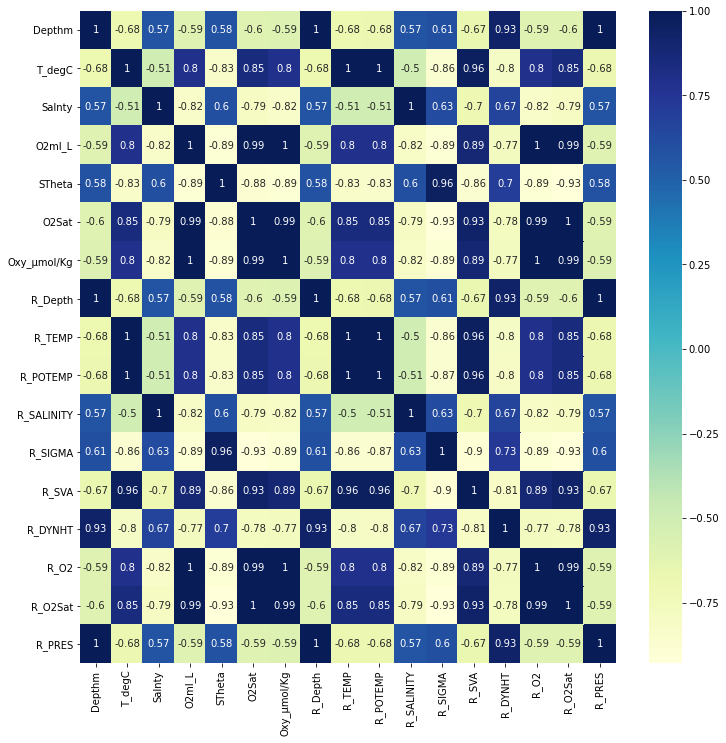

In [13]:
# Observing relation between independent variables:
bottle_indep= bottle.copy()
bottle_indep
bottle_indep.drop('T_degC',axis=1)

fig,ax = plt.subplots(figsize=(12, 12))   
sns.heatmap(bottle_indep.corr(), annot=True, cmap="YlGnBu")
plt.show()

Vairables 'O2Sat' and 'Oxy_µmol/Kg','R_O2', 'R_O2Sat' are highly correlated. Hence reatining 'R_O2' and droped rest.
Variables R_TEMP, R_POTEMP, T_degC are correlated, Hence T_degC is reatained.
Between ariables R_Salinity and Salnty, Salnty is chosen and droped other.
SThetha and R_Sigma too are highly correlated and hence R_Sigma is chosen as this" reported" potential density of water.
Similarly Depthm and R_Depth too. Considered keeping R_Depth.

In [14]:
bottle.drop(['O2Sat','Oxy_µmol/Kg', 'R_O2Sat','R_TEMP', 'R_POTEMP','R_SALINITY','R_SIGMA','Depthm'],axis=1,inplace=True)


In [15]:
#columns retained after analysis:
bottle.columns

Index(['T_degC', 'Salnty', 'O2ml_L', 'STheta', 'R_Depth', 'R_SVA', 'R_DYNHT',
       'R_O2', 'R_PRES', 'month', 'year'],
      dtype='object')

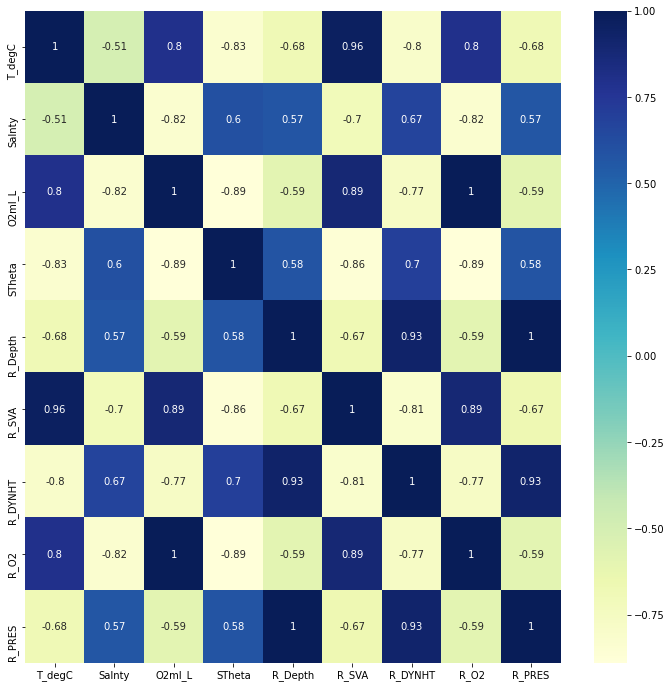

In [16]:
fig,ax = plt.subplots(figsize=(12, 12))   
sns.heatmap(bottle.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Filling all the nan with appropriate values:

In [17]:
colm_list=['T_degC', 'Salnty', 'O2ml_L', 'STheta', 'R_Depth', 'R_SVA', 'R_DYNHT',
       'R_O2', 'R_PRES']

for i in colm_list:
    bottle[i]=bottle[i].fillna(bottle[i].mean())

### RFE:

In [18]:
X=bottle.drop('T_degC',axis=1)
y=bottle['T_degC']

In [19]:
model=LinearRegression()
rfe=RFE(model, n_features_to_select=10)   # 10 varibles are chosen randomly.
X_rfe=rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
print("Model accuracy",rfe.score(X,y))

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]
Model accuracy 0.9630908506322966


In [20]:
cols = list(X.columns)

temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Salnty', 'O2ml_L', 'STheta', 'R_Depth', 'R_SVA', 'R_DYNHT', 'R_O2',
       'R_PRES', 'month', 'year'],
      dtype='object')


By appliying RFE on the columns it is observed that all the chosen columns are equally important. By choosing the variables 10 we get at max of 96% of information from the data. Hence our choice of picking variables is appropriate.


#### 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [21]:
# Linear Regression:

X= np.array(bottle['Salnty']).reshape(-1,1)
y= np.array(bottle['T_degC']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)


bot_reg=LinearRegression()
bot_reg.fit(X_train,y_train)

y_pred=bot_reg.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_pred)

print("r2 score:",score)
print("mean_sqrd_error :",mean_squared_error(y_test,y_pred))
print("root_mean_squared error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.23889976582015215
mean_sqrd_error : 13.50832345579292
root_mean_squared error 3.675367118505704


In [23]:
# Multi Linear Regression:

X1= bottle[['Salnty', 'O2ml_L', 'STheta', 'R_Depth', 'R_SVA', 'R_DYNHT', 'R_O2','R_PRES']]
y1= bottle['T_degC']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=1)

mul_reg=LinearRegression()
mul_reg.fit(X1_train,y1_train)

y1_pred=mul_reg.predict(X1_test)

In [24]:
score1=r2_score(y1_test,y1_pred)

print("r2 score:",score1)
print("mean_sqrd_error :",mean_squared_error(y1_test,y1_pred))
print("root_mean_squared error",np.sqrt(mean_squared_error(y1_test,y1_pred)))

r2 score: 0.9629474971097681
mean_sqrd_error : 0.6576232293862134
root_mean_squared error 0.8109397199460718


In [25]:
X_train=pd.DataFrame(X_train)

In [26]:
X_train=X_train.rename(columns={'0':'Salnty'})

In [27]:
#Intercept:

print("Intercept of Linear model:" ,bot_reg.intercept_ )

print("Intercept of Multi linear model:" ,mul_reg.intercept_)

Intercept of Linear model: [166.82321306]
Intercept of Multi linear model: -123.50759879188757


In [28]:
# Coefficient for linear model:

print(" Coefficient for linear model:", bot_reg.coef_)

#for idx, col_name in enumerate(X1.columns):
print("The coefficient for multi linear model",mul_reg.coef_)

 Coefficient for linear model: [[-4.6105375]]
The coefficient for multi linear model [ 3.65735187e+00  4.06546355e-01  1.50650686e-03 -4.72672325e-01
  4.68214037e-02  2.34632694e+00 -1.95789239e-01  4.62561892e-01]


In [29]:
X1.columns

Index(['Salnty', 'O2ml_L', 'STheta', 'R_Depth', 'R_SVA', 'R_DYNHT', 'R_O2',
       'R_PRES'],
      dtype='object')

Resulting equation for Linear Regression:
y= 166.823 + (-4.6105375)Salnty

Resulting equation for Multi Linear Regression:
y= -123.5075 + (3.657)Salnty + (0.406)O2ml_L + (0.0015)STheta + (-0.4726)R_Depth + (0.0468)R_SVA + (2.346)R_DYNHT +(-0.1957)R_O2 + (0.4625)R_PRES

#### 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

Linear regression one each of independent and dependent variables are chosen and we analyse the correlation of one to other. Where as in Multi linear regression we consider multiple independent variables effect on one single dependent varibale. For these two models data is assumused to be linear.
Here for linear model, effect of salnity on temperature of water is chosen for analysis. The coeffiecient came to be -4.61 where as from multi linear model the effect of salnity along with other independent variables are considered that salanity coefficient turned out to be +3.657. Though there is difference in coefficient it is observed that there is significant relation between salnity and water temperture.
Overall, when ever we find high correlation between two variables it is always advisable to perform multi linear regression also.
On comparing Linear regression and Multi Linear regression, observed that Multi linear regression gives better results.
1. r^2 value got better using multi linear regression and is close to 92%.
2. MSE has been reduced drastically for multi linear regression.

#### 5.	Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that. 

In [30]:
#creating the dataframe

diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
diabetes_df.shape

(768, 9)

In [32]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining the feature matrix and the target.

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']


In [34]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 14, stratify = y)


In [35]:
# Standardizing

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [36]:
#Simplest logistic regression approach
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_predicted = clf.predict(X_test)

In [37]:
clf.score(X_test,y_test)

0.7552083333333334

In [38]:
# Replacing zero to mean of all the columns except for pregnancies and outcome variables. 
#As gender information is not known ignoring that column. 
#Replacing to mean to make data meaning full as zero dont signify any info regarding insuln,glucose levels. 

col=diabetes_df.iloc[:,1:-1].columns
for i in col:
    diabetes_df[i]=diabetes_df[i].replace(0,round(diabetes_df[i].mean()))

### Logistic Regression

In [39]:
X5=np.array(diabetes_df['BMI']).reshape(-1,1)
y5=np.array(diabetes_df['Outcome']).reshape(-1,1).ravel()
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size=0.25)

In [40]:
diabetes_log_bmi= LogisticRegression(solver='liblinear')
diabetes_log_bmi.fit(X5_train,y5_train)

y_pred_bmi= diabetes_log_bmi.predict(X5_test)

print(diabetes_log_bmi.score(X5_test,y5_test))
print(diabetes_log_bmi.score(X5,y5))

0.640625
0.6692708333333334


In [41]:
print(diabetes_log_bmi.coef_)

[[0.08377992]]


In [42]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

con_log_one=confusion_matrix(y5_test, y_pred_bmi)
con_log_one

array([[106,  14],
       [ 55,  17]])

# Multiple Logistic Regression

In [43]:
X=diabetes_df.iloc[:,0:-1]
y=diabetes_df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)

In [44]:
diabetes_log= LogisticRegression(solver='liblinear')
diabetes_log.fit(X_train,y_train)

y_pred= diabetes_log.predict(X_test)

print(diabetes_log.score(X_test,y_test))
print(diabetes_log.score(X,y))

0.7291666666666666
0.7669270833333334


In [45]:
diabetes_log.coef_

array([[ 9.92469912e-02,  3.18128889e-02, -3.01755101e-02,
         5.04681032e-04, -1.12602787e-03,  6.33232571e-02,
         5.64115599e-01,  1.68001684e-02]])

In [46]:
con_log=confusion_matrix(y_test, y_pred)
con_log

array([[107,  18],
       [ 34,  33]])

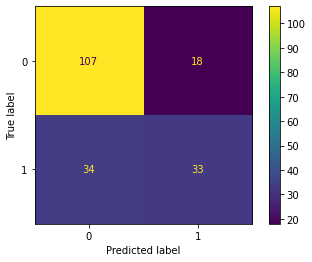

In [47]:
plot_confusion_matrix(diabetes_log, X_test, y_test)

In [48]:
# Multi Logistic using different approach:

dia_mul=LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)

y_pred_mul=dia_mul.predict(X_train)

print(dia_mul.score(X_test,y_test))
print(dia_mul.score(X,y))

0.7447916666666666
0.7721354166666666


#### 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

#### Logistic performance:

In [49]:
TNl = con_log_one[0,0]
TPl = con_log_one[1,1]
FNl = con_log_one[1,0]
FPl = con_log_one[0,1]

Accuracy_logl= (TNl + TPl) / (TNl + TPl + FNl + FPl)
print("Accuracy for  Logistic:",Accuracy_logl)

Accuracy for  Logistic: 0.640625


In [50]:
sens_logl = TPl / (FNl + TPl)

print("Sensitivity for Logistic:", sens_logl)

Sensitivity for Logistic: 0.2361111111111111


In [51]:
spec_logl = TNl / (TNl + FPl)

print("Sensitivity for  Logistic:", spec_logl)

Sensitivity for  Logistic: 0.8833333333333333


#### Multi Logistic performace:


In [52]:
TN = con_log[0,0]
TP = con_log[1,1]
FN = con_log[1,0]
FP = con_log[0,1]

Accuracy_log= (TN + TP) / (TN + TP + FN + FP)
print("Accuracy for Multi Logistic:",Accuracy_log)

Accuracy for Multi Logistic: 0.7291666666666666


In [53]:
sens_log = TP / (FN + TP)

print("Sensitivity for Multi Logistic:", sens_log)

Sensitivity for Multi Logistic: 0.4925373134328358


In [54]:
spec_log = TN / (TN + FP)

print("Sensitivity for Multi Logistic:", spec_log)

Sensitivity for Multi Logistic: 0.856


Multi Logistic model high accuracy compared to logistic model. Diabetes data it is advisable to consider multi logistic as outcome is not dependent on single variable.


#### 7.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

In [56]:
X3=diabetes_df.iloc[:,0:-1]
y3=diabetes_df.iloc[:,-1]

X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.3,stratify=y)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X3_train,y3_train)
y3_predicted = knn.predict(X3_test)
print(y3_predicted)

[0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 0 1 0 1 1]


In [57]:
print(knn.score(X3_test, y3_test))

0.7272727272727273


In [58]:
print(knn.score(X3,y3))

0.75390625


In [59]:
con_knn= confusion_matrix(y3_test, y3_predicted)
con_knn

array([[126,  24],
       [ 39,  42]])

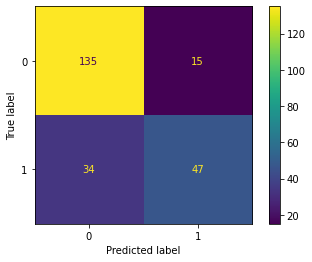

In [62]:
plot_confusion_matrix(diabetes_log, X3_test, y3_test);

In [61]:
TN1 = con_knn[0,0]
TP1 = con_knn[1,1]
FN1 = con_knn[1,0]
FP1 = con_knn[0,1]

Accuracy_knn= (TN1 + TP1) / (TN1 + TP1 + FN1 + FP1)
print("Accuracy for KNN:", Accuracy_knn)

sens_knn = TP1 / (FN1 + TP1)
print("Sensitivity for KNN:", sens_knn)

spec_knn = TN1 / (TN1 + FP1)
print("Sensitivity for Logistic:", spec_knn)

Accuracy for KNN: 0.7272727272727273
Sensitivity for KNN: 0.5185185185185185
Sensitivity for Logistic: 0.84


On comparision betweeen logistic and knn:
Accuracy which is propotion of correct predictions for logistic it is 78% when compared to knn it is 73%.
Sensitivity which is propotion of true positives is slightly less for logistic.
Specificity, propotion of true negatives is same for both the cases.
After considering all, it is advisable to use Logistic Regression when compared with KNN becasue of high accuracy rate. For scenarios like this proper diagnosis is necessary so high accuracy model and lower specificity is preferred.

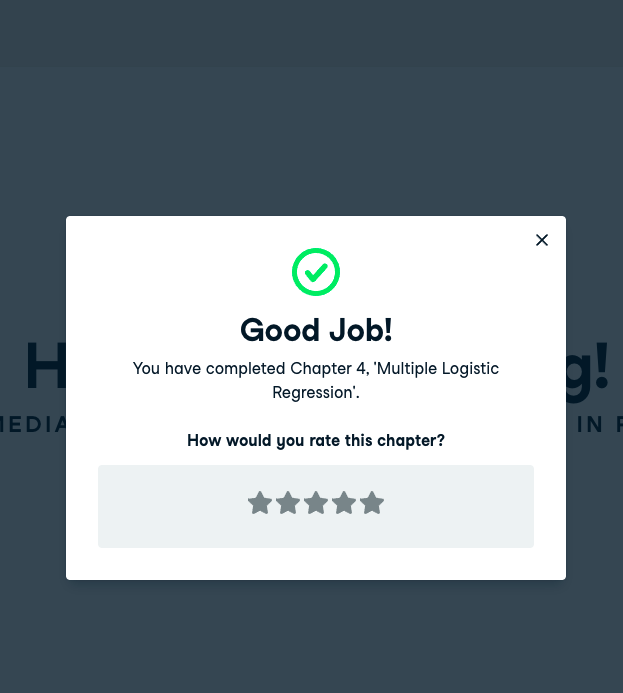